# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Garlic.csv', index_col = 'Date', parse_dates=True)

In [5]:
df

,Price
Date,
2021-06-01,97.5
2021-06-02,105.0
2021-06-03,105.0
2021-06-04,105.0
2021-06-05,105.0
...,...
2022-11-26,100.0
2022-11-27,100.0
2022-11-28,100.0


In [6]:
df.dropna()

,Price
Date,
2021-06-01,97.5
2021-06-02,105.0
2021-06-03,105.0
2021-06-04,105.0
2021-06-05,105.0
...,...
2022-11-26,100.0
2022-11-27,100.0
2022-11-28,100.0


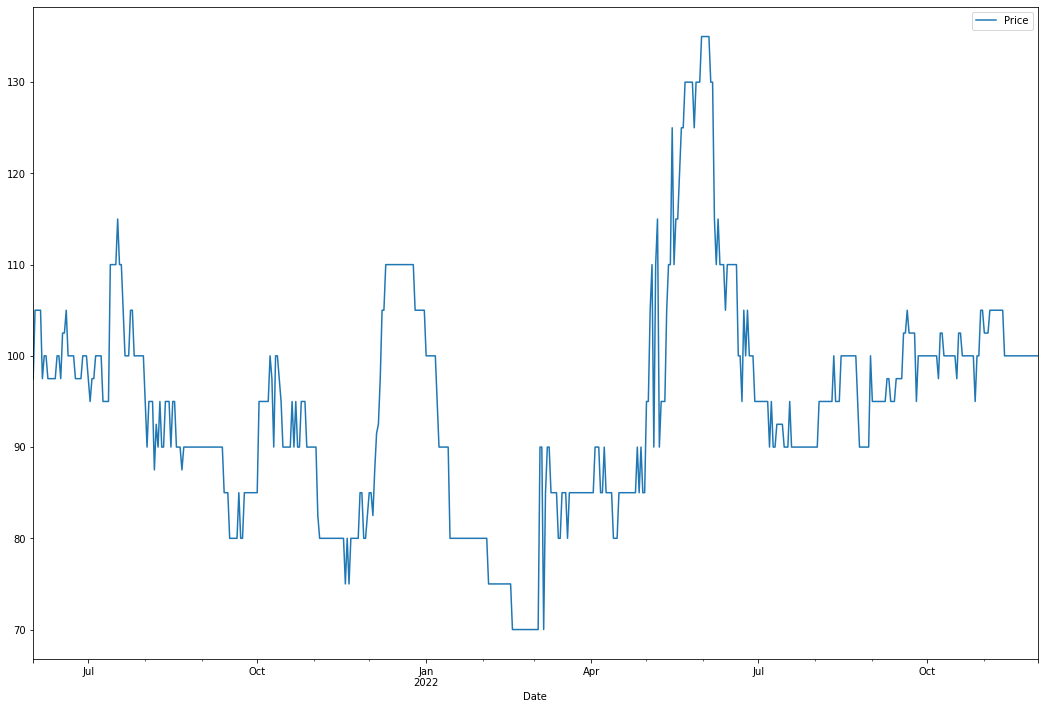

In [7]:
df.plot(figsize = (18, 12));

In [8]:
results = seasonal_decompose(df['Price'], model = 'addtive')

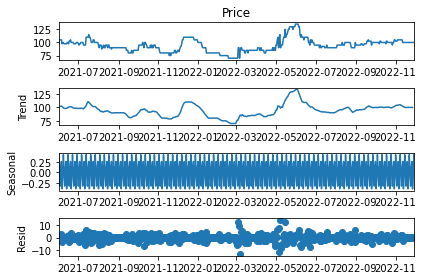

In [9]:
results.plot();

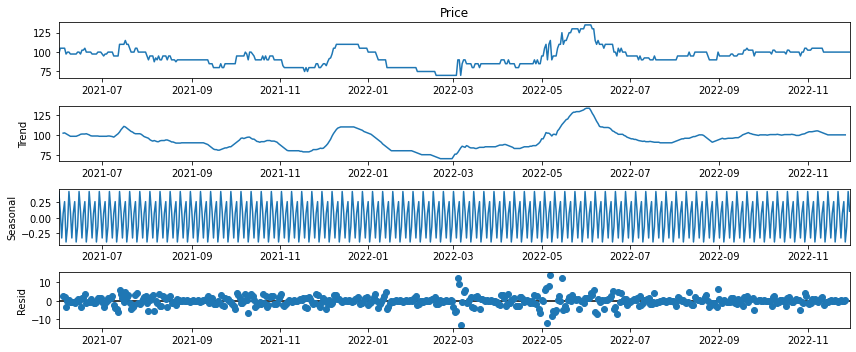

In [10]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

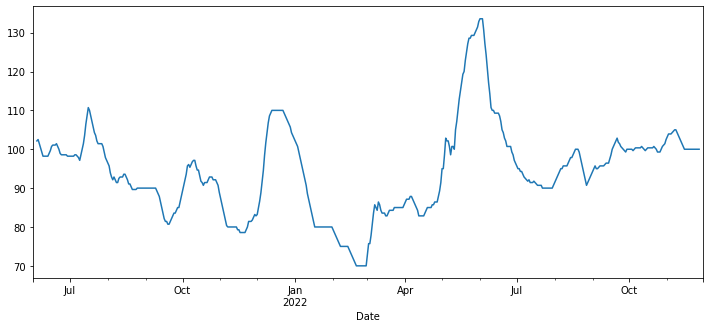

In [11]:
results.trend.plot()

In [12]:
df.index.freq = 'D'

In [13]:
df.head()

,Price
Date,
2021-06-01,97.5
2021-06-02,105.0
2021-06-03,105.0
2021-06-04,105.0
2021-06-05,105.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [15]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [16]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [17]:
test_predictions = fitted_model.forecast(49)

In [18]:
test_predictions

2022-10-14     99.850372
2022-10-15     99.692718
2022-10-16    100.473351
2022-10-17    100.942332
2022-10-18    100.317341
2022-10-19    100.630265
2022-10-20    100.787443
2022-10-21    101.413689
2022-10-22    101.102823
2022-10-23    101.104472
2022-10-24     99.264870
2022-10-25     99.413990
2022-10-26     99.416380
2022-10-27    100.153442
2022-10-28    100.890827
2022-10-29     99.863125
2022-10-30    102.364779
2022-10-31    102.895561
2022-11-01    100.013992
2022-11-02    102.366846
2022-11-03    102.660303
2022-11-04     99.570567
2022-11-05    101.333000
2022-11-06    101.330684
2022-11-07    100.886862
2022-11-08    101.179049
2022-11-09    101.618701
2022-11-10     99.705456
2022-11-11    101.027671
2022-11-12     99.701763
2022-11-13     99.838266
2022-11-14     99.680612
2022-11-15    100.461244
2022-11-16    100.930225
2022-11-17    100.305234
2022-11-18    100.618159
2022-11-19    100.775337
2022-11-20    101.401583
2022-11-21    101.090717
2022-11-22    101.092365


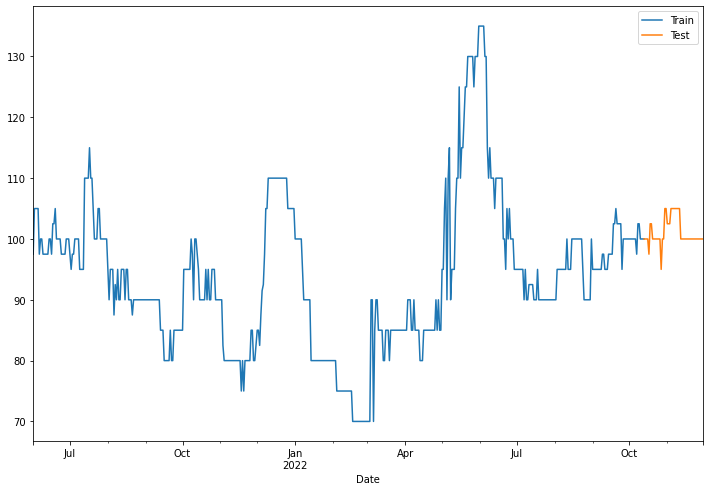

In [19]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [20]:
test_data.describe()

,Price
count,49.000000
mean,101.122449
std,2.285668
min,95.000000
25%,100.000000
50%,100.000000
75%,102.500000
max,105.000000


In [21]:
mean_absolute_error(test_data,test_predictions)


1.6607787356642185

In [22]:
mean_squared_error(test_data, test_predictions)

5.383948230804457

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(test_data, test_predictions)

array([2.59534955, 2.67615189, 2.35350549, 2.26938351, 2.40122019,
       2.31514665, 2.28689485, 2.28089461, 2.26230955, 2.26229584,
       2.92715884, 2.83487044, 2.83343108, 2.46102312, 2.27405102,
       2.5891225 , 2.58089956, 2.87429743, 2.51919378, 2.58189505,
       2.73544427, 2.74335517, 2.27200153, 2.27178807, 2.27445828,
       2.26293237, 2.31601506, 2.66936831, 2.26420896, 2.67133088,
       2.60130476, 2.68263925, 2.35687318, 2.27037645, 2.4053064 ,
       2.31775057, 2.28869964, 2.27938041, 2.26244696, 2.26242444,
       2.9348565 , 2.84218289, 2.84073705, 2.46581503, 2.27531599,
       2.5950325 , 2.57509394, 2.86684499, 2.52454406])

In [25]:
np.sqrt(mean_squared_error(test_data, test_predictions))

2.320333646440627

In [26]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [27]:
forecast_predictions = final_model.forecast(60)

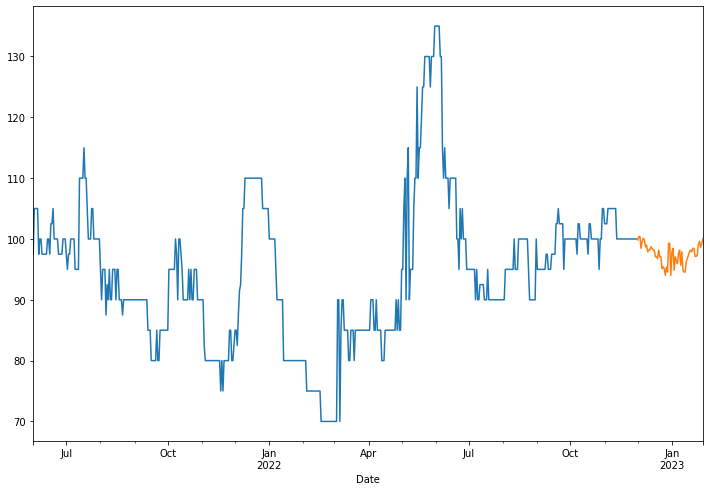

In [28]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [29]:
forecast_predictions

2022-12-01     99.844492
2022-12-02    100.399828
2022-12-03    100.399736
2022-12-04     98.454944
2022-12-05     99.566217
2022-12-06    100.121384
2022-12-07     99.843404
2022-12-08     98.731656
2022-12-09     99.009364
2022-12-10     97.898117
2022-12-11     98.175613
2022-12-12     98.175012
2022-12-13     98.730480
2022-12-14     98.452803
2022-12-15     98.175112
2022-12-16     98.175052
2022-12-17     97.064181
2022-12-18     97.064919
2022-12-19     96.787344
2022-12-20     98.176568
2022-12-21     97.065579
2022-12-22     97.065970
2022-12-23     95.121720
2022-12-24     95.399308
2022-12-25     95.121343
2022-12-26     94.010284
2022-12-27     95.398935
2022-12-28     94.565341
2022-12-29     99.287413
2022-12-30     99.287195
2022-12-31     94.009213
2023-01-01     97.898086
2023-01-02     98.453136
2023-01-03     94.841988
2023-01-04     97.064057
2023-01-05     96.508847
2023-01-06     95.953714
2023-01-07     97.620871
2023-01-08     98.176273
2023-01-09     95.676913


# *SARIMAX*

In [30]:
from datetime import datetime

In [31]:
df_KN = pd.read_csv('Garlic.csv', index_col = 'Date', parse_dates = True)

In [32]:
df_KN.index.freq ='D'

In [33]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [34]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adf_test(df_KN['Price'])

ADF Statistics: -3.3133245372464684
p- value: 0.014293272388210349
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [36]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [37]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,97.5,NaN
2021-06-02,105.0,7.5
2021-06-03,105.0,0.0
2021-06-04,105.0,0.0
2021-06-05,105.0,0.0


In [38]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -3.3133245372464684
p- value: 0.014293272388210349
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [39]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [40]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -11.925849013126872
p- value: 4.909348000663469e-22
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [41]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [42]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -5.109982171804787
p- value: 1.3385336451440545e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


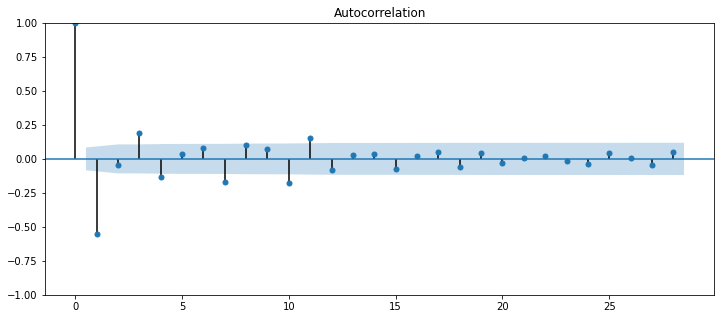

In [43]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

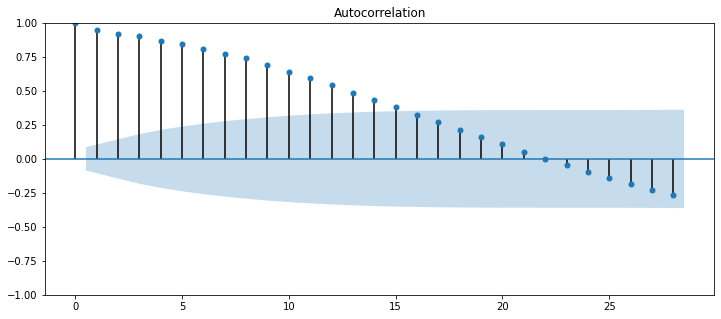

In [44]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

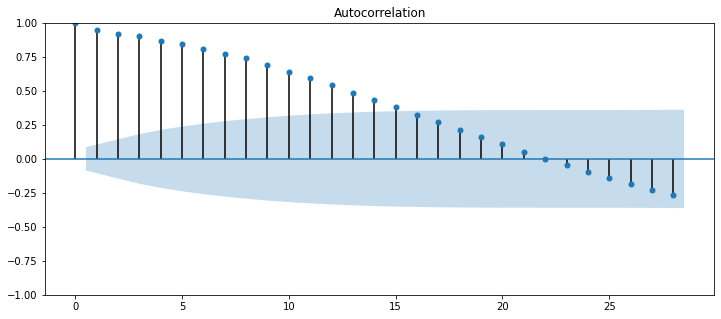

In [45]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

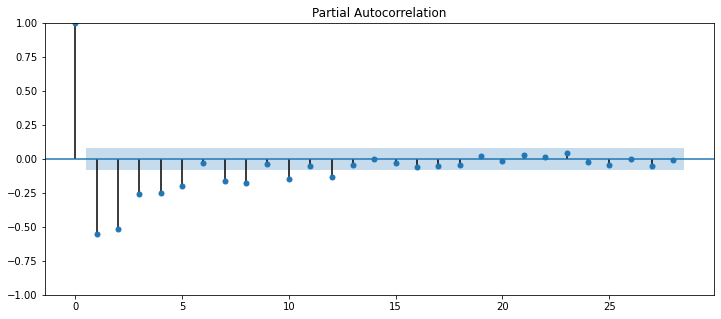

In [46]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [47]:

from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [48]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [49]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [50]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,100.0,0.0,0.0,5.0
2022-10-03,100.0,0.0,0.0,5.0
2022-10-04,100.0,0.0,0.0,5.0
2022-10-05,100.0,0.0,0.0,5.0
2022-10-06,100.0,0.0,0.0,5.0
2022-10-07,97.5,-2.5,-2.5,2.5
2022-10-08,102.5,5.0,7.5,7.5
2022-10-09,102.5,0.0,-5.0,5.0
2022-10-10,100.0,-2.5,-2.5,2.5


In [51]:
import statsmodels.api as sm

In [52]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pmdarima import ARIMA

In [55]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,97.5,NaN,NaN,NaN
2021-06-02,105.0,7.5,NaN,NaN
2021-06-03,105.0,0.0,-7.5,NaN
2021-06-04,105.0,0.0,0.0,NaN
2021-06-05,105.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,100.0,0.0,-5.0,10.0
2022-09-28,100.0,0.0,0.0,10.0
2022-09-29,100.0,0.0,0.0,10.0


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [58]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [59]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood               -1376.007
Date:                             Sat, 07 Jan 2023   AIC                           2770.014
Time:                                     00:05:57   BIC                           2807.156
Sample:                                 06-01-2021   HQIC                          2784.642
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2050      0.301      7.333      0.000       1.616       2.794
ar.L2         -1.4511      0.591     -2.456      0.014      -2.609      -0.293
ar.L3          0.2409      0.292      0.825      0.409      -0.331       0.813
ma.L1         -1.5606      0.305     -5.117      0.000      -2.158      -0.963
ma.L2          0.5601      0.398      1.406      0.160      -0.221       1.341
ma.L3          0.2055      0.097      2.112      0.035       0.015       0.396
ma.L4         -0.3118      0.079     -3.929      0.000      -0.467      -0.156
ma.L5          0.1633      0.046      3.518      0.000       0.072       0.254
sigma2        23.6654      1.161     20.382      0.000      21.390      25.941
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               165.85
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [61]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

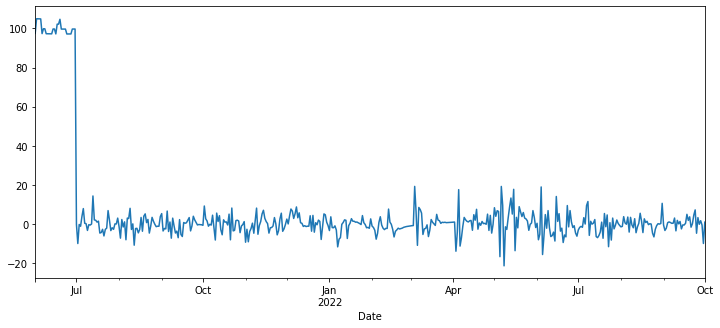

In [62]:
model_SARIMAX_fit.resid.plot()

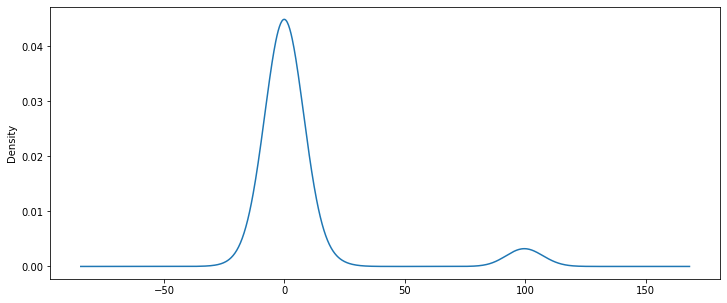

In [63]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [64]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [65]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,100.0,0.0,0.0,5.0,100.693693
2022-10-03,100.0,0.0,0.0,5.0,99.243342
2022-10-04,100.0,0.0,0.0,5.0,100.508232
2022-10-05,100.0,0.0,0.0,5.0,100.433897
2022-10-06,100.0,0.0,0.0,5.0,100.167908
2022-10-07,97.5,-2.5,-2.5,2.5,99.836828
2022-10-08,102.5,5.0,7.5,7.5,99.474873
2022-10-09,102.5,0.0,-5.0,5.0,101.593129
2022-10-10,100.0,-2.5,-2.5,2.5,101.196869


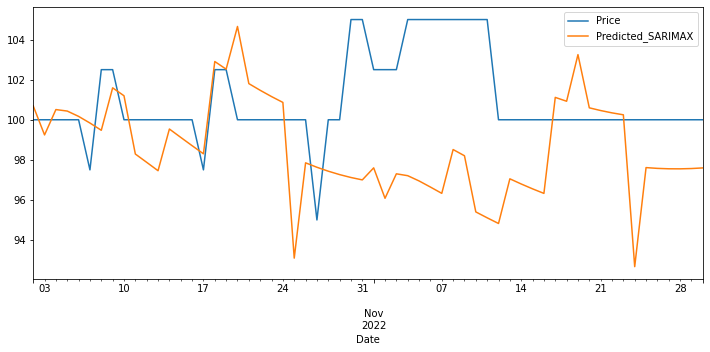

In [66]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [67]:
pred_Sarimax

2022-10-02    100.693693
2022-10-03     99.243342
2022-10-04    100.508232
2022-10-05    100.433897
2022-10-06    100.167908
2022-10-07     99.836828
2022-10-08     99.474873
2022-10-09    101.593129
2022-10-10    101.196869
2022-10-11     98.289887
2022-10-12     97.875555
2022-10-13     97.457083
2022-10-14     99.537560
2022-10-15     99.119964
2022-10-16     98.707137
2022-10-17     98.301783
2022-10-18    102.906445
2022-10-19    102.523503
2022-10-20    104.655154
2022-10-21    101.803411
2022-10-22    101.470092
2022-10-23    101.156818
2022-10-24    100.865004
2022-10-25     93.095865
2022-10-26     97.850407
2022-10-27     97.629433
2022-10-28     97.433544
2022-10-29     97.263143
2022-10-30     97.118438
2022-10-31     96.999451
2022-11-01     97.599715
2022-11-02     96.081162
2022-11-03     97.302579
2022-11-04     97.208854
2022-11-05     96.946763
2022-11-06     96.641946
2022-11-07     96.327573
2022-11-08     98.513575
2022-11-09     98.203976
2022-11-10     95.401233


In [68]:
predicted_value_SARIMA = pred_Sarimax

In [69]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [70]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

3.208611443247589

In [71]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

17.983203324260042

In [72]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

4.240660717890556

# ***FB Prophet***

In [73]:
df_fb  = pd.read_csv('Garlic.csv')

In [74]:
df_fb.columns = ['ds', 'y']

In [75]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [76]:
df_fb.head()

,ds,y
0,2021-06-01,97.5
1,2021-06-02,105.0
2,2021-06-03,105.0
3,2021-06-04,105.0
4,2021-06-05,105.0


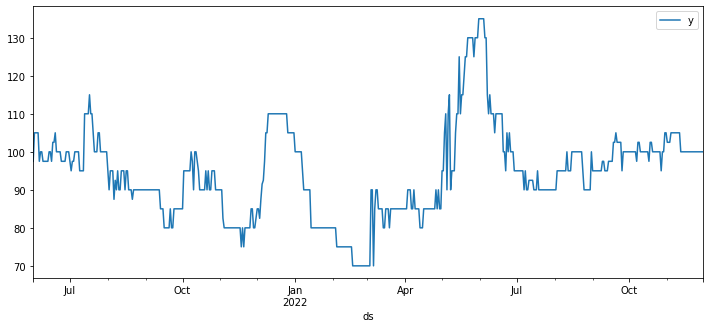

In [77]:
df_fb.plot(x='ds', y='y')

In [78]:
len(df_fb)

548

In [79]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [80]:
import prophet

In [81]:
import io, os, sys, setuptools, tokenize

In [82]:
from fbprophet import Prophet

In [83]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,89.224850,77.170520,102.351773,87.028986,91.404078,0.336649,0.336649,0.336649,0.336649,0.336649,0.336649,0.0,0.0,0.0,89.561499
544,2022-11-27,89.137909,75.406218,100.991886,86.878035,91.382351,-0.523761,-0.523761,-0.523761,-0.523761,-0.523761,-0.523761,0.0,0.0,0.0,88.614148
545,2022-11-28,89.050968,75.878207,101.830117,86.731881,91.385934,-0.178044,-0.178044,-0.178044,-0.178044,-0.178044,-0.178044,0.0,0.0,0.0,88.872924
546,2022-11-29,88.964027,75.565745,101.916597,86.580025,91.398991,0.356528,0.356528,0.356528,0.356528,0.356528,0.356528,0.0,0.0,0.0,89.320555
547,2022-11-30,88.877086,75.271927,102.350673,86.451338,91.398413,0.119311,0.119311,0.119311,0.119311,0.119311,0.119311,0.0,0.0,0.0,88.996397


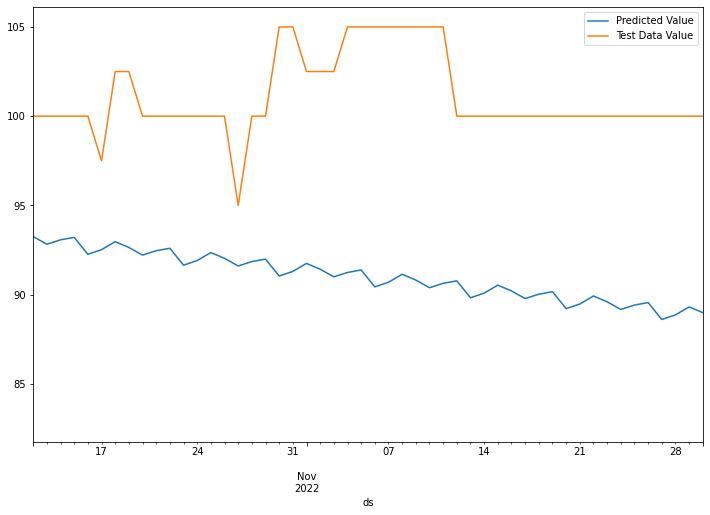

In [85]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [86]:
from statsmodels.tools.eval_measures import rmse

In [87]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [88]:
predictions_fb

488    93.482844
489    93.741621
490    94.189252
491    93.865093
492    93.437534
493    93.682526
494    93.821609
495    92.874257
496    93.133034
497    93.580665
498    93.256506
499    92.828947
500    93.073939
501    93.213022
502    92.265670
503    92.524447
504    92.972078
505    92.647919
506    92.220360
507    92.465352
508    92.604435
509    91.657083
510    91.915860
511    92.363491
512    92.039332
513    91.611773
514    91.856765
515    91.995848
516    91.048496
517    91.307273
518    91.754903
519    91.430745
520    91.003186
521    91.248178
522    91.387260
523    90.439909
524    90.698686
525    91.146316
526    90.822158
527    90.394598
528    90.639591
529    90.778673
530    89.831322
531    90.090099
532    90.537729
533    90.213571
534    89.786011
535    90.031004
536    90.170086
537    89.222735
538    89.481512
539    89.929142
540    89.604984
541    89.177424
542    89.422416
543    89.561499
544    88.614148
545    88.872924
546    89.3205

In [89]:
test_fb

,ds,y
488,2022-10-02,100.0
489,2022-10-03,100.0
490,2022-10-04,100.0
491,2022-10-05,100.0
492,2022-10-06,100.0
493,2022-10-07,97.5
494,2022-10-08,102.5
495,2022-10-09,102.5
496,2022-10-10,100.0
497,2022-10-11,100.0


In [90]:
mean_absolute_error(test_fb['y'], predictions_fb)

9.520253472631476

In [91]:
mean_squared_error(test_fb['y'], predictions_fb)

98.19467435542377

In [92]:
rmse(predictions_fb, test_fb['y'])

9.909322598211432

In [93]:
test_fb.mean()

y    100.958333
dtype: float64

In [94]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [95]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [96]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,103.725638,88.530770,117.408872,95.0,2022-08-02
1,2022-08-04,103.458561,89.713249,117.873351,95.0,2022-08-02
2,2022-08-05,103.929060,89.332851,118.912774,95.0,2022-08-02
3,2022-08-06,104.235638,88.850579,118.468285,95.0,2022-08-02
4,2022-08-07,103.460040,89.353104,117.434327,95.0,2022-08-02


In [98]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,76.788073,8.762880,8.758723,0.092197,0.091942,1.000000
1,7 days,78.723736,8.872640,8.865706,0.093323,0.093013,1.000000
2,8 days,80.932449,8.996246,8.990723,0.094639,0.095462,1.000000
3,9 days,70.233787,8.380560,8.159478,0.085543,0.094485,1.000000
4,10 days,70.782188,8.413215,8.188887,0.085853,0.094485,1.000000
5,11 days,74.595555,8.636872,8.398658,0.088061,0.097769,1.000000
6,12 days,75.184128,8.670878,8.431936,0.088411,0.097769,1.000000
7,13 days,63.536121,7.970955,7.575085,0.079021,0.095535,1.000000
8,14 days,53.324194,7.302342,6.848734,0.070950,0.071322,1.000000
9,15 days,54.403506,7.375873,6.973752,0.072200,0.071322,1.000000


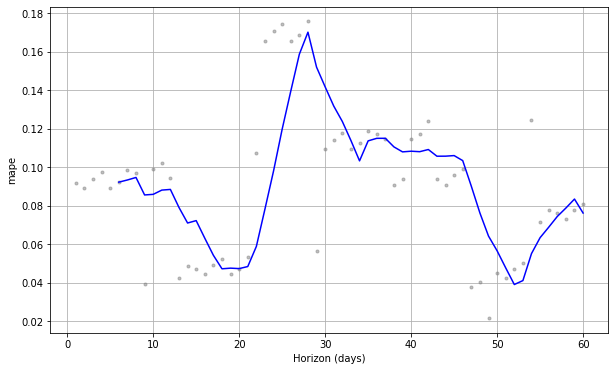

In [99]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [100]:
df_t = pd.read_csv('Garlic.csv')

In [101]:
df_t.columns = ['ds', 'y']

In [102]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [103]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [104]:
t.fit(df_t)

In [105]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

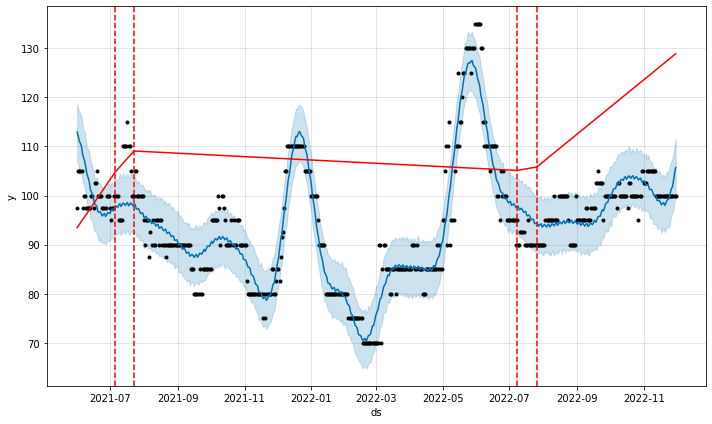

In [106]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [107]:
df_S = pd.read_csv('Garlic.csv')

In [108]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


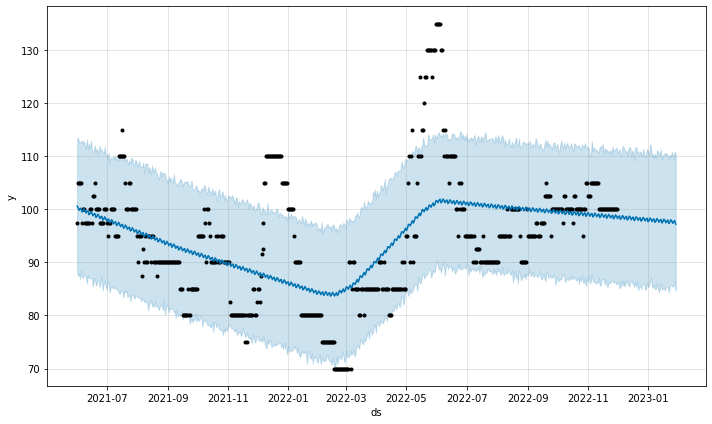

In [109]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

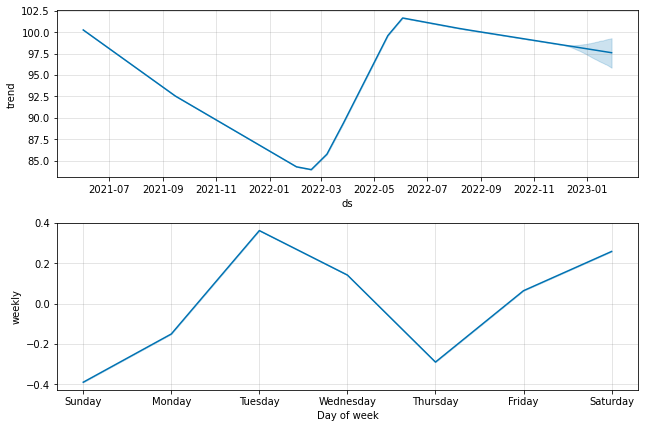

In [110]:
figure = S.plot_components(forecast);

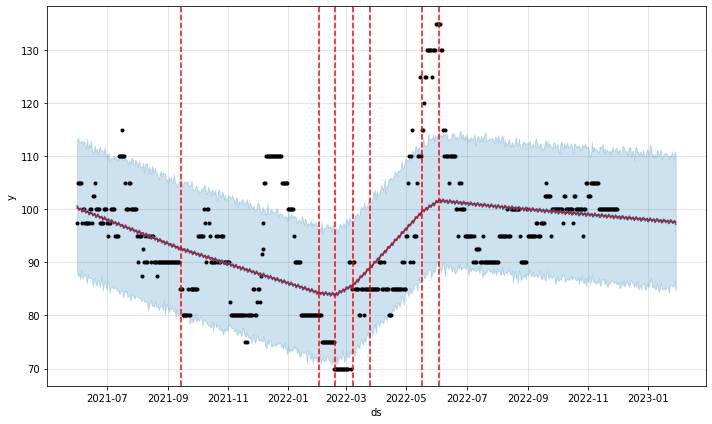

In [111]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


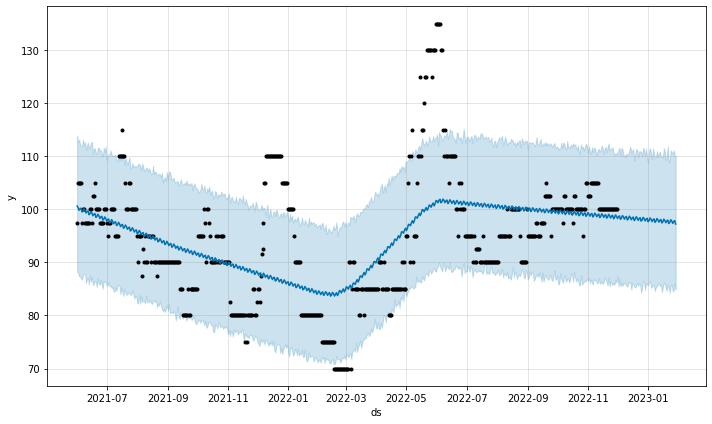

In [112]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

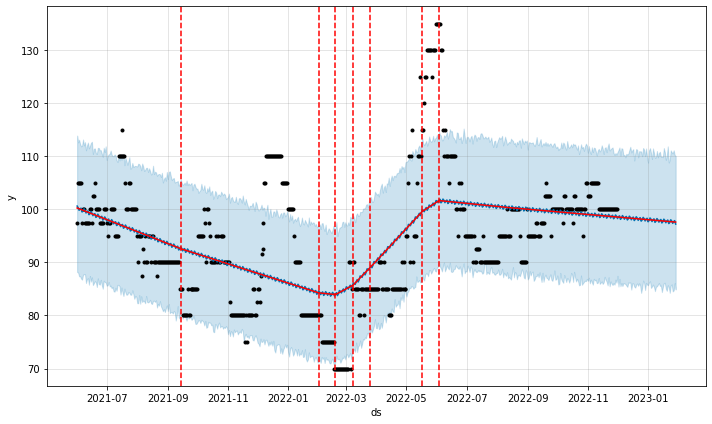

In [113]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

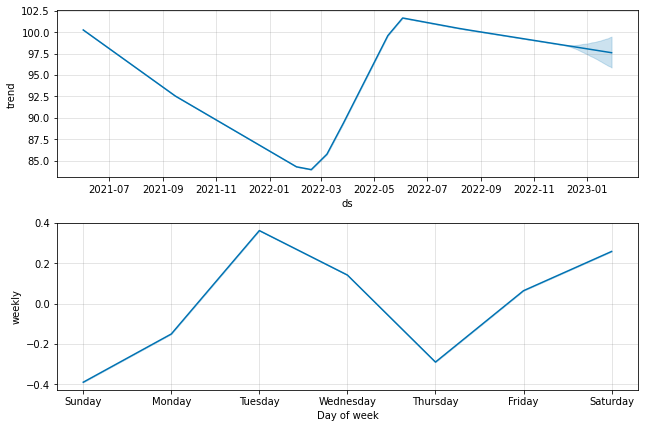

In [114]:
figure = S.plot_components(forecast)

# ***LSTM***

In [115]:
df_LSTM=pd.read_csv("Garlic.csv",parse_dates=["Date"],index_col=[0])

In [116]:
print(df_LSTM.index.freq)

None


In [117]:
test_split=round(len(df_LSTM)*0.20)

In [118]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [119]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [120]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [121]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [122]:
df_for_training_scaled

array([[0.42307692],
       [0.53846154],
       [0.53846154],
       [0.53846154],
       [0.53846154],
       [0.42307692],
       [0.46153846],
       [0.46153846],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.46153846],
       [0.46153846],
       [0.42307692],
       [0.5       ],
       [0.5       ],
       [0.53846154],
       [0.46153846],
       [0.46153846],
       [0.46153846],
       [0.46153846],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.46153846],
       [0.46153846],
       [0.46153846],
       [0.42307692],
       [0.38461538],
       [0.42307692],
       [0.42307692],
       [0.46153846],
       [0.46153846],
       [0.46153846],
       [0.46153846],
       [0.38461538],
       [0.38461538],
       [0.38461538],
       [0.38461538],
       [0.61538462],
       [0.61538462],
       [0.61538462],
       [0.61538462],
       [0.69230769],
       [0.615

In [123]:
df_for_training_scaled.shape

(438, 1)

In [124]:
df_for_testing_scaled.shape

(110, 1)

In [125]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [126]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [127]:
trainX.shape

(408, 30, 1)

In [128]:
testX,testY=createXY(df_for_testing_scaled,30)

In [129]:
trainX[0]

array([[0.42307692],
       [0.53846154],
       [0.53846154],
       [0.53846154],
       [0.53846154],
       [0.42307692],
       [0.46153846],
       [0.46153846],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.46153846],
       [0.46153846],
       [0.42307692],
       [0.5       ],
       [0.5       ],
       [0.53846154],
       [0.46153846],
       [0.46153846],
       [0.46153846],
       [0.46153846],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.42307692],
       [0.46153846],
       [0.46153846],
       [0.46153846]])

In [130]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [131]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [132]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.42307692]
 [0.53846154]
 [0.53846154]
 [0.53846154]
 [0.53846154]
 [0.42307692]
 [0.46153846]
 [0.46153846]
 [0.42307692]
 [0.42307692]
 [0.42307692]
 [0.42307692]
 [0.42307692]
 [0.46153846]
 [0.46153846]
 [0.42307692]
 [0.5       ]
 [0.5       ]
 [0.53846154]
 [0.46153846]
 [0.46153846]
 [0.46153846]
 [0.46153846]
 [0.42307692]
 [0.42307692]
 [0.42307692]
 [0.42307692]
 [0.46153846]
 [0.46153846]
 [0.46153846]]

trainY[0]--  0.4230769230769229


In [133]:
trainY[0]

0.4230769230769229

In [134]:
trainY.shape

(408,)

In [135]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [136]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 6s 123ms/step - loss: 0.0785 - val_loss: 0.0044
Epoch 2/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0229 - val_loss: 0.0043
Epoch 3/32
13/13 [==============================] - 1s 39ms/step - loss: 0.0166 - val_loss: 0.0018
Epoch 4/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0138 - val_loss: 0.0019
Epoch 5/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0127 - val_loss: 0.0017
Epoch 6/32
13/13 [==============================] - 0s 35ms/step - loss: 0.0132 - val_loss: 0.0044
Epoch 7/32
13/13 [==============================] - 0s 33ms/step - loss: 0.0110 - val_loss: 0.0028
Epoch 8/32
13/13 [==============================] - 0s 36ms/step - loss: 0.0098 - val_loss: 0.0041
Epoch 9/32
13/13 [==============================] - 0s 35ms/step - loss: 0.0104 - val_loss: 0.0017
Epoch 10/32
13/13 [==============================] - 0s 36ms/step - loss: 0.0105 - val_loss: 0.0014
Epoch 11

In [139]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 64, 'optimizer': 'adam'}

In [140]:
my_model=grid_search.best_estimator_.model

In [141]:
my_model

In [142]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 10ms/step


In [143]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.39871058]
 [0.38876808]
 [0.3833595 ]
 [0.39869046]
 [0.41073975]
 [0.41676456]
 [0.41871652]
 [0.45537856]
 [0.48029393]
 [0.5103289 ]
 [0.5058167 ]
 [0.49801752]
 [0.4933904 ]
 [0.49186674]
 [0.43601137]
 [0.43698812]
 [0.4461136 ]
 [0.45280656]
 [0.45572978]
 [0.45600238]
 [0.45504057]
 [0.45373496]
 [0.45255572]
 [0.4516783 ]
 [0.4511193 ]
 [0.4508268 ]
 [0.43236288]
 [0.45696148]
 [0.47668087]
 [0.46724722]
 [0.4579268 ]
 [0.45294166]
 [0.45121953]
 [0.45111275]
 [0.4515349 ]
 [0.4519516 ]
 [0.43380785]
 [0.45842442]
 [0.47795668]
 [0.4682059 ]
 [0.45855838]
 [0.45327625]
 [0.45130447]
 [0.45101398]
 [0.4513435 ]
 [0.45168775]
 [0.41552475]
 [0.42712328]
 [0.44074824]
 [0.48647213]
 [0.51506436]
 [0.50634277]
 [0.4957898 ]
 [0.48985773]
 [0.5073284 ]
 [0.51996815]
 [0.5258707 ]
 [0.5277419 ]
 [0.52798355]
 [0.52783716]
 [0.5277135 ]
 [0.52765596]
 [0.48848498]
 [0.46436134]
 [0.45428684]
 [0.45151895]
 [0.45133492]
 [0.45141035]
 [0.45105886]
 [0.45032635]
 [0.4494

In [144]:
scaler.inverse_transform(prediction)

array([[ 95.91618 ],
       [ 95.26993 ],
       [ 94.918365],
       [ 95.91489 ],
       [ 96.69808 ],
       [ 97.0897  ],
       [ 97.21657 ],
       [ 99.59961 ],
       [101.21911 ],
       [103.17138 ],
       [102.87809 ],
       [102.37114 ],
       [102.07037 ],
       [101.97134 ],
       [ 98.34074 ],
       [ 98.40423 ],
       [ 98.99738 ],
       [ 99.43243 ],
       [ 99.62244 ],
       [ 99.64016 ],
       [ 99.577644],
       [ 99.49277 ],
       [ 99.41612 ],
       [ 99.35909 ],
       [ 99.32276 ],
       [ 99.30374 ],
       [ 98.103584],
       [ 99.70249 ],
       [100.98426 ],
       [100.37106 ],
       [ 99.76524 ],
       [ 99.44121 ],
       [ 99.32927 ],
       [ 99.322334],
       [ 99.34977 ],
       [ 99.376854],
       [ 98.19752 ],
       [ 99.797585],
       [101.067184],
       [100.43338 ],
       [ 99.8063  ],
       [ 99.46295 ],
       [ 99.33479 ],
       [ 99.31591 ],
       [ 99.337326],
       [ 99.3597  ],
       [ 97.00911 ],
       [ 97.7

In [145]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [146]:
prediction_copies_array.shape

(80, 1)

In [147]:
prediction_copies_array

array([[0.39871058],
       [0.38876808],
       [0.3833595 ],
       [0.39869046],
       [0.41073975],
       [0.41676456],
       [0.41871652],
       [0.45537856],
       [0.48029393],
       [0.5103289 ],
       [0.5058167 ],
       [0.49801752],
       [0.4933904 ],
       [0.49186674],
       [0.43601137],
       [0.43698812],
       [0.4461136 ],
       [0.45280656],
       [0.45572978],
       [0.45600238],
       [0.45504057],
       [0.45373496],
       [0.45255572],
       [0.4516783 ],
       [0.4511193 ],
       [0.4508268 ],
       [0.43236288],
       [0.45696148],
       [0.47668087],
       [0.46724722],
       [0.4579268 ],
       [0.45294166],
       [0.45121953],
       [0.45111275],
       [0.4515349 ],
       [0.4519516 ],
       [0.43380785],
       [0.45842442],
       [0.47795668],
       [0.4682059 ],
       [0.45855838],
       [0.45327625],
       [0.45130447],
       [0.45101398],
       [0.4513435 ],
       [0.45168775],
       [0.41552475],
       [0.427

In [148]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [149]:
pred

array([ 95.91618 ,  95.26993 ,  94.918365,  95.91489 ,  96.69808 ,
        97.0897  ,  97.21657 ,  99.59961 , 101.21911 , 103.17138 ,
       102.87809 , 102.37114 , 102.07037 , 101.97134 ,  98.34074 ,
        98.40423 ,  98.99738 ,  99.43243 ,  99.62244 ,  99.64016 ,
        99.577644,  99.49277 ,  99.41612 ,  99.35909 ,  99.32276 ,
        99.30374 ,  98.103584,  99.70249 , 100.98426 , 100.37106 ,
        99.76524 ,  99.44121 ,  99.32927 ,  99.322334,  99.34977 ,
        99.376854,  98.19752 ,  99.797585, 101.067184, 100.43338 ,
        99.8063  ,  99.46295 ,  99.33479 ,  99.31591 ,  99.337326,
        99.3597  ,  97.00911 ,  97.76301 ,  98.648636, 101.62069 ,
       103.47919 , 102.912285, 102.22634 , 101.84075 , 102.97635 ,
       103.797935, 104.181595, 104.30323 , 104.31893 , 104.30942 ,
       104.30138 , 104.29764 , 101.751526, 100.18349 ,  99.52865 ,
        99.34873 ,  99.33677 ,  99.341675,  99.31883 ,  99.27122 ,
        99.21477 ,  99.16495 ,  99.130936,  99.11568 ,  99.117

In [150]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [151]:
pred

array([ 95.91618 ,  95.26993 ,  94.918365,  95.91489 ,  96.69808 ,
        97.0897  ,  97.21657 ,  99.59961 , 101.21911 , 103.17138 ,
       102.87809 , 102.37114 , 102.07037 , 101.97134 ,  98.34074 ,
        98.40423 ,  98.99738 ,  99.43243 ,  99.62244 ,  99.64016 ,
        99.577644,  99.49277 ,  99.41612 ,  99.35909 ,  99.32276 ,
        99.30374 ,  98.103584,  99.70249 , 100.98426 , 100.37106 ,
        99.76524 ,  99.44121 ,  99.32927 ,  99.322334,  99.34977 ,
        99.376854,  98.19752 ,  99.797585, 101.067184, 100.43338 ,
        99.8063  ,  99.46295 ,  99.33479 ,  99.31591 ,  99.337326,
        99.3597  ,  97.00911 ,  97.76301 ,  98.648636, 101.62069 ,
       103.47919 , 102.912285, 102.22634 , 101.84075 , 102.97635 ,
       103.797935, 104.181595, 104.30323 , 104.31893 , 104.30942 ,
       104.30138 , 104.29764 , 101.751526, 100.18349 ,  99.52865 ,
        99.34873 ,  99.33677 ,  99.341675,  99.31883 ,  99.27122 ,
        99.21477 ,  99.16495 ,  99.130936,  99.11568 ,  99.117

In [152]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [ 95.91618   95.26993   94.918365  95.91489   96.69808   97.0897
  97.21657   99.59961  101.21911  103.17138  102.87809  102.37114
 102.07037  101.97134   98.34074   98.40423   98.99738   99.43243
  99.62244   99.64016   99.577644  99.49277   99.41612   99.35909
  99.32276   99.30374   98.103584  99.70249  100.98426  100.37106
  99.76524   99.44121   99.32927   99.322334  99.34977   99.376854
  98.19752   99.797585 101.067184 100.43338   99.8063    99.46295
  99.33479   99.31591   99.337326  99.3597    97.00911   97.76301
  98.648636 101.62069  103.47919  102.912285 102.22634  101.84075
 102.97635  103.797935 104.181595 104.30323  104.31893  104.30942
 104.30138  104.29764  101.751526 100.18349   99.52865   99.34873
  99.33677   99.341675  99.31883   99.27122   99.21477   99.16495
  99.130936  99.11568   99.117805  99.133705  99.16075   99.191284
  99.2234    99.252754]

Original Values--  [ 95.   95.   97.5  97.5  97.5  97.5 102.5 102.5 105.  102.5 102.5 102.5
 102

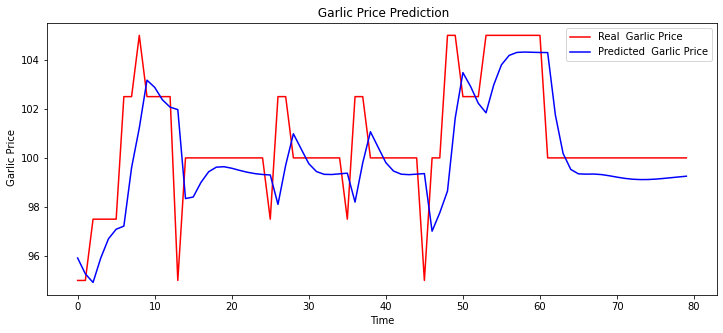

In [153]:
plt.plot(original, color = 'red', label = 'Real  Garlic Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Garlic Price')
plt.title(' Garlic Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Garlic Price')
plt.legend()
plt.show()

In [154]:
mean_absolute_error(original, pred)

1.3888510704040526

In [155]:
mean_squared_error(original, pred)

4.0003273906833785

In [156]:
rmse(pred, original)

2.000081845996153